
 Method  linear
y_test =  [ 1.  0.  0.  0.  0.  1.  1.  0.  0.  0.  1.  1.  0.  0.  1.  0.  0.  0.
  1.  1.  0.  0.  0.  1.  0.  0.  0.  1.  0.  1.  0.  0.  1.  0.  0.  0.
  0.  1.  1.  0.  0.  1.  1.  0.  0.  1.  1.  1.  0.  0.  1.  0.  0.  0.
  0.  0.  1.  0.  1.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  1.
  0.  1.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  1.  1.
  1.  1.  0.  1.  1.  0.  1.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
  0.  1.  1.  0.  1.  1.  1.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  1.
  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  1.]
y_predicted =  [ 0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  1.  1.  0.  0.  1.  0.  1.  0.
  1.  1.  0.  1.  0.  1.  0.  0.  0.  1.  0.  1.  0.  0.  1.  0.  0.  0.
  0.  1.  1.  1.  0.  1.  1.  0.  0.  1.  1.  1.  0.  0.  1.  0.  0.  0.
  0.  0.  1.  0.  1.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  1.
  0.  1.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  1.  1.
  1.  1.  0.  0.  1.  0.  1.  1.  0.

C:\Users\Valentin\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Users\Valentin\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)



 Method  poly
y_test =  [ 1.  0.  0.  0.  0.  1.  1.  0.  0.  0.  1.  1.  0.  0.  1.  0.  0.  0.
  1.  1.  0.  0.  0.  1.  0.  0.  0.  1.  0.  1.  0.  0.  1.  0.  0.  0.
  0.  1.  1.  0.  0.  1.  1.  0.  0.  1.  1.  1.  0.  0.  1.  0.  0.  0.
  0.  0.  1.  0.  1.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  1.
  0.  1.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  1.  1.
  1.  1.  0.  1.  1.  0.  1.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
  0.  1.  1.  0.  1.  1.  1.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  1.
  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  1.]
y_predicted =  [ 0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  1.  1.  0.  0.  1.  0.  1.  0.
  0.  1.  0.  1.  0.  1.  0.  0.  0.  1.  0.  1.  0.  0.  1.  0.  0.  0.
  0.  1.  1.  1.  0.  1.  1.  0.  0.  1.  1.  1.  0.  0.  1.  0.  0.  0.
  0.  0.  1.  0.  1.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  1.
  0.  1.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  1.  1.
  1.  1.  0.  0.  0.  0.  1.  1.  0.  

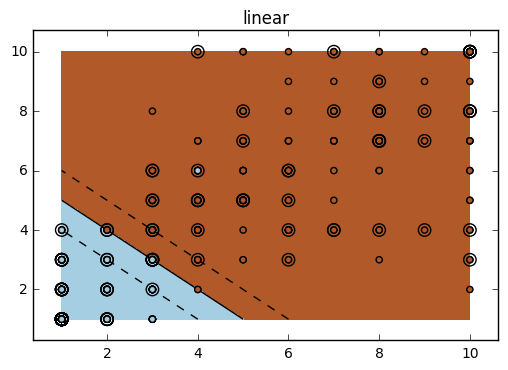

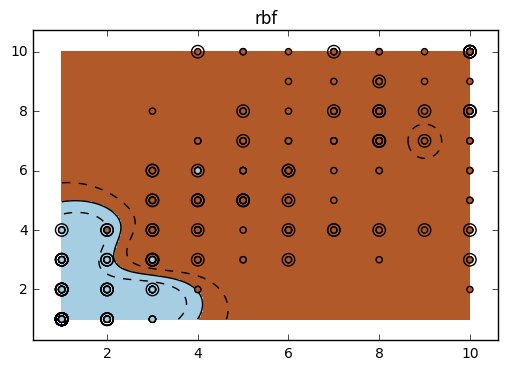

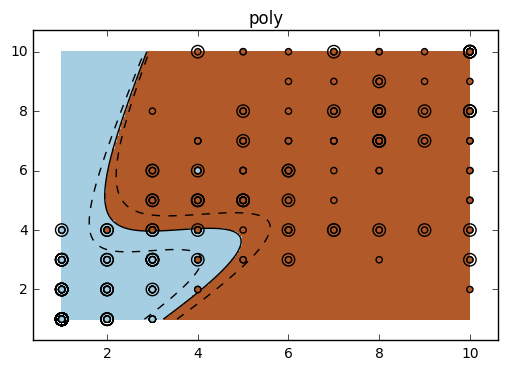

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, svm
from sklearn.metrics import r2_score
from sklearn import metrics

#Our dataset source
#https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
#Descritption : https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.names
#The data : https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data
#We Treated the database we downloaded : we simply changed the column name of Y to simplify understandability. We also removed some datas which were unusable (? were on some lines)

df=pd.read_csv("./Files/dataSetCancer.csv") #we read the CSV file
y = df['target']
X = df.iloc[:,2:4] #X will be the second and third line here, we could set any 2 features except the target

#we randomly change the order of line in order to limit possible bias (such as sorted dataset for instance)
n_sample = len(X)
np.random.seed(0) #We set the seed to be 0 to have the same results on each computer
order = np.random.permutation(n_sample)
X=X.as_matrix()
y=y.as_matrix()
X = X[order]
y = y[order].astype(np.float)

#We choose for our model to be 80/20 partitionized : 80% training and 20% test
X_train = X[:int(.8 * n_sample)]
y_train = y[:int(.8 * n_sample)]
X_test = X[int(.8 * n_sample):]
y_test = y[int(.8 * n_sample):]


# We test 3 different type of models
for fig_num, kernel in enumerate(('linear', 'rbf', 'poly')):
    clf = svm.SVC(kernel=kernel, gamma=0.8) #we tried to ajust the gamma in order to avoid a too specific model (overfitting)
    clf.fit(X_train, y_train) #We fit our model

    #We  predict with our model what the target is :
    y_pred = clf.predict(X_test)
    # We verify our predictions :
    print("\n Method ",kernel)
    print ("y_test = ",y_test)
    print("y_predicted = ", y_pred)
    print("r score =", clf.score(X_test, y_test))
    r2 = r2_score(y_test, y_pred)
    print("r2 score : =", r2)
    #We print the classification matrix
    print('Verification : \n', metrics.classification_report(y_test, y_pred))
    #The r2 score is showing us if the model is good or not (1 being perfect)
    # => we can see there that the rbf model seems to be the more precise one

    #We plot our results
    plt.figure(fig_num)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
    edgecolor='k', s=20)
    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
    zorder=10, edgecolor='k')
    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
    linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
    plt.title(kernel)



#With all the features :
y = df['target']
X = df.iloc[:,2:12]

n_sample = len(X)
np.random.seed(0)
order = np.random.permutation(n_sample)

X=X.as_matrix()
y=y.as_matrix()

X = X[order]
y = y[order].astype(np.float)

X_train = X[:int(.8 * n_sample)]
y_train = y[:int(.8 * n_sample)]
X_test = X[int(.8 * n_sample):]
y_test = y[int(.8 * n_sample):]

print(X)

for fig_num, kernel in enumerate(('linear', 'rbf', 'poly')):
    clf = svm.SVC(kernel=kernel, gamma=0.8)
    clf.fit(X_train, y_train)
    #We  predict with our model what the target is :
    y_pred = clf.predict(X_test)
    # We verify our predictions :
    print("\n With all the features Method ",kernel)
    print ("y_test = ",y_test)
    print("y_predicted = ", y_pred)
    r2 = r2_score(y_test, y_pred)
    print("r score =", clf.score(X_test, y_test))
    print("r2 score : =", r2)
    #We print the classification matrix
    print('Verification : \n', metrics.classification_report(y_test, y_pred))

plt.show() #we show our plots

#We can see that adding features improved our score : we are really close to 100% right prediction, nontheless it may create an overfitted model